<a href="https://colab.research.google.com/github/RajaChowdhury/EDA-CAPSTONE-PROJECT/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## **`Importing Essential Libraries For Data Exploring, Cleaning, Analysing And visualisation`**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **`Importing My Dataset`**






In [2]:
dataset_url = 'https://raw.githubusercontent.com/RajaChowdhury/EDA-CAPSTONE-PROJECT/main/Hotel%20Bookings.csv'

#Storing my raw dataset
raw_df = pd.read_csv(dataset_url)

# **`First Lets Explore Our Dataset`**

In [3]:
raw_df.shape

#so we have 119390 rows and 32 columns

(119390, 32)

In [4]:
raw_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
raw_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **`Lets Give A Brief Summary About The Columns`**

**1.   hotel**

*   Resort Hotel
*   City Hotel

**2. is _canceled**   
 
*   0 as not cancelled
*   1 as cancelled

**3. lead_time**

*  the time gap between booking and arrival

**4. arrival_date_year**

*   arrival year of the guest in hotel

**5. arrival_date_month**

*  arrival month of the guest in hotel

**6. arrival_date_week_number**

*   arrival week of the guest in hotel

**7. arrival_date_day_of_month**

*   arrival day of month of the guest in hotel

**8. stays_in_weekend_nights**

*   number of weekend nights stayed in hotel

**9. stayed_in_week_nights**

*   number of week nights stayed in hotel

**10. adults**

*   number of adults stayed in hotel

**11. children**

*   number of children stayed in hotel

**12. babies**

*   number of babies stayed in hotel

**13. meal**

*  Types of meal guests have preferred: BB – Bed & Breakfast, HB – Half board (breakfast and one other meal – usually dinner), FB – Full board (breakfast, lunch and dinner), SC - Self Catering or Undefined.

**14. country**

*  Country from which guests have arrived
 
**15. market_segment**

 * TA - Travel Agents
 * TO - Travel Operstors

**16. distribution_channel**
 
 * The channels through which hotel get its booking.
   * TA - Travel Agents
   * TO - Travel Operstors

**17. is_repeated_guest**

 * 0 indicates as non repeated guest
 * 1 indicates as repeated guest

**18. previous_cancellation**

*  Number of previous bookings that were cancelled by the customer prior to the current booking.

**19. previous_bookings_not_canceled**

* Number of previous bookings not cancelled by the customer prior to the current booking

**20. reserved_room_type**

* Code for type of room booked prior to arrival.

**21. assigned_room_type**

* Code for type of room assigned at arrival.

**22. booking_changes**

* Number of time changes made to the booking.

**23. deposit_type**

* No Deposit – no deposit was made
* No Refund – deposit was made with no refund condition
* Refundable – deposit was made with refundable condition

**24. agent**

* Code of the travel agency who made the booking.

**25. company**

* Code of the travel company who made the booking.

**26. day_in_waiting_list**

* Number of days the booking was in the waiting list before it was confirmed to the customer

**27. customer_type**

* Contract - when booking was a part of allotment or any contract.
* Group - when booking was made by a group of people.
* Transient - individuals or groups that stays for short term.
* Transient-party - when the booking is transient, but is associated to at least other transient booking.

**28. adr**

* It is a average daily rate(adr) which states the average rental revenue earned for an occupied room per day.

**29. required_car_parking_spaces**

* Number of car parking spaces required by the customer.

**30. total_of_special_requests**

* Number of special requests made by the customer to the hotel.

**31. reservation_status**

* Canceled – reservation was cancelled 
* Check-Out – checked in and departed  
* No-Show – reservation was made but did not show up.

**32. reservation_status_date**

* Day at which last resevation status was made.

In [6]:
raw_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
raw_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# **`Lets Start Cleaning Our Dataset`**

In [9]:
#As we can see Agent and Company columns have most number of null values so first get rid of them by eliminating them.

columns = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']

#Lets make a copy of original dataset without eliminated columns.

df = raw_df[columns].copy()

**There Were Some Null Values Present In Children And Country Columns Too, So Just Drop All The Rows Containing Null Values.**

In [10]:
df = df.dropna(axis = 0)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**Now Children And Babies Both can be Represented As Kids, So Just Join Them As Kids columns And Drop The irrelevant Columns**.

In [11]:
#Here we are taking kids as children + babies.
df['kids'] = df.children + df.babies
df = df.drop(['babies', 'children'], axis=1)

#Here we are taking total guests as adults + kids.
df['total_guests'] = df.kids + df.adults

# **`Now lets start analysis and visualisation of our dataset`**

In [12]:
df.groupby(['arrival_date_month', 'arrival_date_year']).count()

hotel  is_canceled  lead_time  \
arrival_date_month arrival_date_year                                  
April              2016                5404         5404       5404   
                   2017                5641         5641       5641   
August             2015                3873         3873       3873   
                   2016                5054         5054       5054   
                   2017                4925         4925       4925   
December           2015                2900         2900       2900   
                   2016                3828         3828       3828   
February           2016                3857         3857       3857   
                   2017                4155         4155       4155   
January            2016                2215         2215       2215   
                   2017                3659         3659       3659   
July               2015                2763         2763       2763   
                   2016                4552         4552       4552   
                   2017                5313         5313       5313   
June               2016                5280         5280       5280   
                   2017                5647         5647       5647   
March              2016                4788         4788       4788   
                   2017                4951         4951       4951   
May                2016                5466         5466       5466   
                   2017                6313         6313       6313   
November           2015                2320         2320       2320   
                   2016                4432         4432       4432   
October            2015                4919         4919       4919   
                   2016                6176         6176       6176   
September          2015                5084         5084       5084   
                   2016                5383         5383       5383   

                                      arrival_date_week_number  \
arrival_date_month arrival_date_year                             
April              2016                                   5404   
                   2017                                   5641   
August             2015                                   3873   
                   2016                                   5054   
                   2017                                   4925   
December           2015                                   2900   
                   2016                                   3828   
February           2016                                   3857   
                   2017                                   4155   
January            2016                                   2215   
                   2017                                   3659   
July               2015                                   2763   
                   2016                                   4552   
                   2017                                   5313   
June               2016                                   5280   
                   2017                                   5647   
March              2016                                   4788   
                   2017                                   4951   
May                2016                                   5466   
                   2017                                   6313   
November           2015                                   2320   
                   2016                                   4432   
October            2015                                   4919   
                   2016                                   6176   
September          2015                                   5084   
                   2016                                   5383   

                                      arrival_date_day_of_month  \
arrival_date_month arrival_date_year                              
April              2016                                    5404   

### **`So from above code we can find out that our data starts from July-2015 to August-2017, which means july and august have data for three months and others have for two months.`**

Text(0.5, 1.0, 'Yearly Bookings')

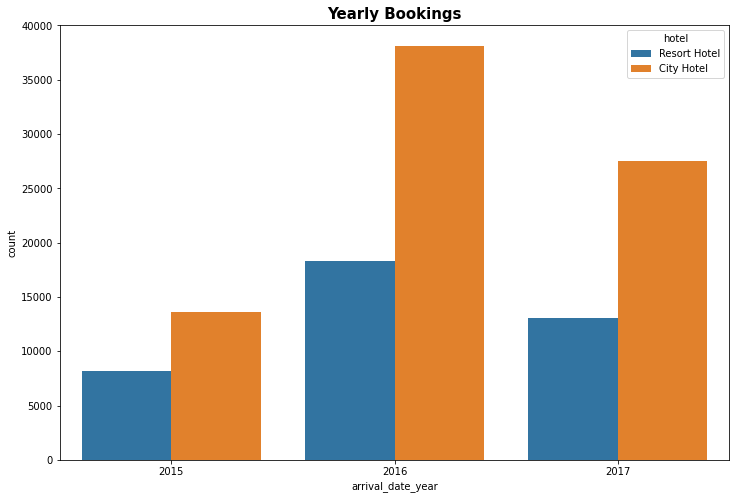

In [13]:
plt.figure(figsize=(12,8))
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel').set_title ("Yearly Bookings", fontweight="bold", size=15)

**so we can clearly see that city hotel had higher number of booking than resort hotel for all the three years**

In [14]:
df_copy= df.copy()
df_copy['no_of_bookings']= 1
df_copy.loc[(df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy.loc[~((df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August')),'no_of_bookings']/=2

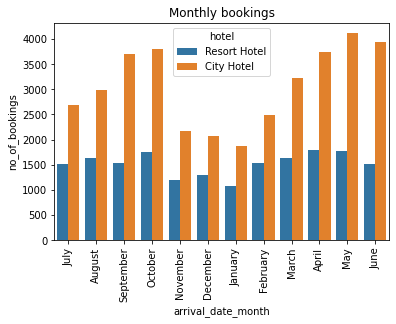

In [17]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.title("Monthly bookings")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy['hotel'], estimator= sum, data= df_copy)
plt.xticks(rotation = 90)
plt.show()
#plt.figure(figsize=(15,15))
#sns.countplot (x= 'arrival_date_month', data= df_copy, hue= 'hotel').set_title ("Monthly Bookings", fontweight="bold", size=15)

** from the above graph we can conclude the following things**
1. for each month, number of booking for city hotel is higher.
2. it can be seen that April, May, June had the higher number of booking while november, december, and january had the lower number of booking.

Text(0.5, 1.0, 'perfercence of customer')

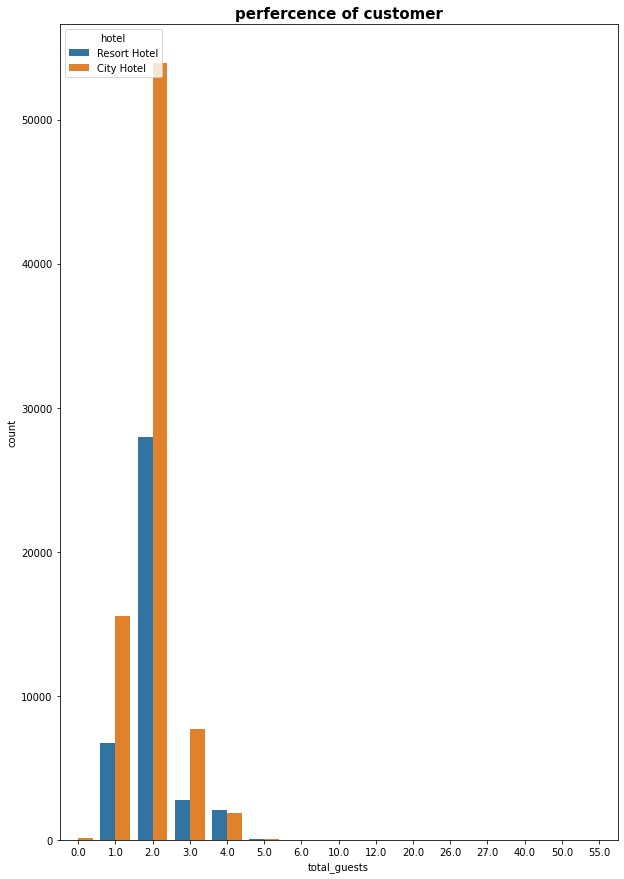

In [18]:

plt.figure(figsize=(10,15))
sns.countplot (x= 'total_guests', data= df, hue= 'hotel').set_title ("perfercence of customer", fontweight="bold", size=15)

from here we can conclude that small family or small number of people prefers city hotel and large family or large group of ppl prefers resort hotel.
